# Chapter 14 - The Mechanics of TensorFlor

A Key feature of TF is that we can work with GPUs. It also supports mobile deployment, which makes it a very suitable tool for production.

The following examples example illustrates how to retrieve the rank ans shape of tensor objects.

In [3]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

## define the computation graph
with g.as_default():
    
    # define tensors t1, t2, t3
    t1 = tf.constant(np.pi)
    t2 = tf.constant([1,2,3,4])
    t3 = tf.constant([[1,2], [3,4]])
    
    # get their ranks
    r1 = tf.rank(t1)
    r2 = tf.rank(t2)
    r3 = tf.rank(t3)
    
    #get their shapes
    s1 = t1.get_shape()
    s2 = t2.get_shape()
    s3 = t3.get_shape()
    print('Shapes:', s1, s2, s3)

Shapes: () (4,) (2, 2)


In [4]:
#Shapes can only be retrieved in an eactive session (by evaluating the tensors)
with tf.Session(graph = g) as sess:
    print("Ranks:",
         r1.eval(),
         r2.eval(),
         r3.eval())

Ranks: 0 1 2


### Computation graphs

Computation graphs are the basis of TensorFlow, the steps of TF are as follows:
* 1) Instantiate a new, empty computation graph
* 2) Add nodes (tensors and operations) to the computation graph
* 3) Execute the graph
    * a) Start a new session
    * b) Initialize the variables in the graph
    * c) Run the computation graph in this session


It is possible to evaluate a individual tensor by calling the eval() method, providing that all placeholders that are necessary to reach that tensor are provided.
Similarly, .run() can be used to execute operations that do not have any return types. or tf.Session().run() to run both tensors and operators, which will return a list or tuple of the same size.

In [6]:
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name = 'a')
    b = tf.constant(2, name = 'b')
    c = tf.constant(3, name = 'c')
    
    z = 2*(a-b) + c
    
with tf.Session(graph=g) as sess:
    print('2*(a-b) + c =>', sess.run(z))

2*(a-b) + c => 1


### Placeholders

As seen above, a constant can be feed to the computation graph. However, if the values have to be put in later, we can use placeholders to create shape and type of the data that will be feed trough the computation graph on later time.

We will create placeholders and tensors to compute the same above
 

In [11]:
import tensorflow as tf

g = tf.Graph()

with g.as_default():
    tf_a = tf.placeholder(tf.int32, shape = [],
                         name = 'tf_a')
    tf_b = tf.placeholder(tf.int32, shape = [],
                         name = 'tf_b')
    tf_c = tf.placeholder(tf.int32, shape = [],
                         name = 'tf_c')
    
    r1 = tf_a-tf_b
    r2 = 2 * r1
    z = r2 + tf_c

In [12]:
with tf.Session(graph = g) as sess:
    feed = {tf_a : 1,
           tf_b : 2,
           tf_c : 3}
    print('z:', sess.run(z, feed_dict = feed))

z: 1


#### Placeholders for data arrays with varying batchsizes

If we do not know beforehand the shape of a structure, we can doe as follows;

In [13]:
import tensorflow as tf

g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(tf.float32,
                         shape =[None, 2], #Set shape on the first dimension to None
                         name = 'tf_x')
    
    x_mean = tf.reduce_mean(tf_x,
                           axis = 0,
                           name = 'mean')

In [15]:
import numpy as np
np.random.seed(123)
np.set_printoptions(precision = 2)

with tf.Session(graph = g) as sess:
    x1 = np.random.uniform(low=0, high = 1, size =(5,2))
    
    print('Feeding data with shape ', x1.shape)
    print('Results:', sess.run(x_mean, feed_dict = {tf_x : x1}))
    
    x2 = np.random.uniform(low = 0, high = 1, size = (10,2))
    
    print('Feeding data with shape ', x2.shape)
    print('Results', sess.run(x_mean, feed_dict = {tf_x : x2}))
    

Feeding data with shape  (5, 2)
Results: [0.62 0.47]
Feeding data with shape  (10, 2)
Results [0.46 0.49]


In [17]:
print(tf_x) #Check shape --> First dimension is unknown/None

Tensor("tf_x:0", shape=(?, 2), dtype=float32)


## Tensorflow variables

Variables can be used to store parameters of a model that can be updated during training. Variables have to be initialized with a tensor of values. Defining variables can be done in two ways:
* tf.Variable(<initial-values>, name = 'variable name); class that creates object for new variable, shape and dtype are set to the same as those of the initial values.
* tf.get_variable(name, ...); can be used to reuse an existing variable with a given name that exists in the graph, or sets a new variable if name is not yet occupied.

The last method has several advantages; it allows to reuse variables and uses the popular Xavier/Glorot initializion scheme. It also provides other parameters to control the tensor (suc as adding a regularizer).
\
It is important to realize that the initial values are not set until we launceh the graph in tf.Session and explicitly run the initializer operator. The required memory for a graph is not allocated until we initialize the variables in a TF session.



In [18]:
import tensorflow as tf
import numpy as np

g1 = tf.Graph()

with g1.as_default():
    w = tf.Variable(np.array([[1,2,3,4], [5,6,7,8]]), name = 'w') #detype is automaticaly inferred from the np array input
    
    print(w)

Instructions for updating:
Colocations handled automatically by placer.
<tf.Variable 'w:0' shape=(2, 4) dtype=int32_ref>


### Initializing variables

Variables must be initialized, otherwise the code cannot be executed -> use tf.global_cariables_initializer()

In [19]:
with tf.Session(graph = g1) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))

[[1 2 3 4]
 [5 6 7 8]]


We can also run the tf.global_variables_initializer as object by:
init_op = tf.global_variables_initializer()
sess.run(init_op) or/ init_op.run()

be careful to set the object after all variables are defined.

In [23]:
import tensorflow as tf

g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(1, name = 'w1')
    init_op = tf.global_variables_initializer()
    w2 = tf.Variable(2, name = 'w2')

In [24]:
with tf.Session(graph = g2) as sess:
    sess.run(init_op)
    print('w1:', sess.run(w1))

w1: 1


In [25]:
with tf.Session(graph = g2) as sess:
    sess.run(init_op)
    print('w2:', sess.run(w2))
#Cannot be evaluated as w2 was not initiated properly.

FailedPreconditionError: Attempting to use uninitialized value w2
	 [[{{node _retval_w2_0_0}}]]

### Variable scoping

Can be used to organize variables into seperate subparts that can be further nested. Look at the following example

In [27]:
import tensorflow as tf

g = tf.Graph()

with g.as_default():
    with tf.variable_scope('net_A'):
        with tf.variable_scope('layer-1'):
            w1 = tf.Variable(tf.random_normal(shape = (10,4)), name = 'weights')
        with tf.variable_scope('layer-2'):
            w2 = tf.Variable(tf.random_normal(shape = (20,10)), name = 'weights')
    with tf.variable_scope('net_B'):
        with tf.variable_scope('layer-1'):
            w3 = tf.Variable(tf.random_normal(shape = (10,4)), name = 'weights')
            
    print(w1)
    print(w2)
    print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>


## Reusing variables

Example; developing a complex NN with input data from multiple sources. Xa,ya from source A and Xb,yb from source B. We will design our graph that we will use data from only one source as input to build the network. Then, we can feed the data from the other source to the same classifier.

Data from source A is fed trhoguh placeholder, source B is the output of a generator network. We will build the generator network by calling the build_generator function with in the generator scope. Then we will ad a classifiery by calling build_classifier within the classifier scope.

In [31]:
import tensorflow as tf

######################
## Helper functions ##
######################

def build_classifier(data, labels, n_classes = 2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(name = 'weights',
                             shape = (data_shape[1], n_classes), dtype = tf.float32)
    bias = tf.get_variable(name = 'bias', initializer = tf.zeros(shape = n_classes))
    
    logits = tf.add(tf.matmul(data, weights), bias, name = 'logits')
    
    return logits, tf.nn.softmax(logits)

def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.random_normal(shape = (data_shape[1], n_hidden)), name = 'w1')
    b1 = tf.Variable(tf.zeros(shape = n_hidden), name = 'b1')
    hidden = tf.add(tf.matmul(data, w1), b1, name = 'hidden_pre-activation')
    
    w2 = tf.Variable(tf.random_normal(shape=(n_hidden, data_shape[1])), name = 'w2')
    b2 = tf.Variable(tf.zeros(shape = data_shape[1]), name = 'b2')
    output = tf.add(tf.matmul(hidden, w2), b2, name = 'output')
    
    return output, tf.nn.sigmoid(output)

#####################
## Build the graph ##
#####################

batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100),
                         dtype = tf.float32, name = 'tf_X')
    
    #build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data = tf_X, n_hidden = 50)
        
    #build the classifier
    with tf.variable_scope('classifier') as scope:
        cls_out1 = build_classifier(data = tf_X, labels = tf.ones(shape = batch_size))
        
        #reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(data = gen_out1[1], labels = tf.zeros(shape = batch_size))
        
    #OR reuse the classifier for generated data as follows/
    #with tf.variable_scope('classifier', reuse = True):
    #    cls_out2 = build_classifier(data = gen_out1[1], labels = tf.zeros(shape = batch_size))

## Building a regression model

y = wx + b

all tenors:
* Input x: tf_x defined as placeholder
* input y: tf_y defined as placeholder
* Model parameter w: weight defined as variable
* Model parameter b: bias defined as variable
* moedel output y^: y_hat returned by the TF operations to compute the rpediction using the regression model 

In [33]:
import tensorflow as tf
import numpy as np

g = tf.Graph()

with g.as_default():
    tf.set_random_seed(123)
    
    ##Placeholders
    tf_x = tf.placeholder(shape = (None), dtype = tf.float32, name = 'tf_x')
    tf_y = tf.placeholder(shape = (None), dtype = tf.float32, name = 'tf_y')
    
    #Define the variable
    weight = tf.Variable(tf.random_normal(shape = (1,1), stddev=0.25), name = 'weight')
    bias = tf.Variable(0.0, name = 'bias')
    
    ## Build the model
    y_hat = tf.add((weight * tf_x), bias, name = 'y_hat')
    
    #compute the cost
    cost = tf.reduce_mean(tf.square(tf_y - y_hat), name = 'cost')
    
    ##Train the model
    optim = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
    
    train_op = optim.minimize(cost, name = 'train_op')
    

Instructions for updating:
Use tf.cast instead.


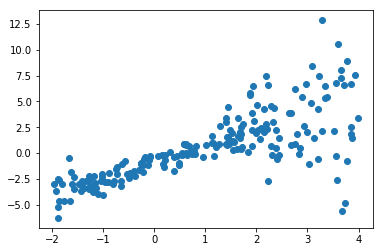

In [35]:
## create a random toy dataset for regression

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low = -2, high = 4, size = 200)
    y = []
    for t in x:
        r = np.random.normal(loc = 0.0, scale = (0.5 + t*t/3))
        y.append(r)
    return x, 1.726*x-0.84 + np.array(y)

x, y = make_random_data()

plt.plot(x, y, 'o')
plt.show()

In [37]:
#Train the model
#Train/test splits
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

n_epochs = 500
training_cost = []

with tf.Session(graph = g) as sess:
    sess.run(tf.global_variables_initializer())
    
    #train the model for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op],
                       feed_dict = {tf_x: x_train,
                                   tf_y: y_train})
        training_cost.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e,c))

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


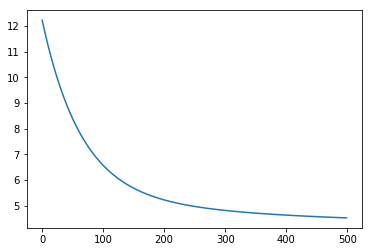

In [39]:
plt.plot(training_cost)
plt.show()

Objects in a TF graph can also be excuted by using their names: NOTE; TF appends given tensor-names with :0 (or with _1:0 if name is already in use)

In [41]:
n_epochs = 500
training_cost = []

with tf.Session(graph = g) as sess:
    sess.run(tf.global_variables_initializer())
    
    #train the model for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run(['cost:0', 'train_op'], #use names
                       feed_dict = {'tf_x:0': x_train,
                                   'tf_y:0': y_train})
        training_cost.append(c)
        if e % 50 == 0:
            print('Epoch {:4d} : {:4f}'.format(e,c)) #other printing layout, same as other

Epoch    0 : 12.223014
Epoch   50 : 8.387571
Epoch  100 : 6.572100
Epoch  150 : 5.684377
Epoch  200 : 5.226913
Epoch  250 : 4.972521
Epoch  300 : 4.816942
Epoch  350 : 4.711897
Epoch  400 : 4.634660
Epoch  450 : 4.574225


## Saving and restoring a model in TF

We cannot use the previously trained model for predicting, as TF clears the memory if a session is ended. We can save a model by using a tf.train.Saver class, which we call a saver.

We have to add a saver to our graph g

In [42]:
with g.as_default():
    saver = tf.train.Saver()

In [43]:
#retrain the model with an dditional call to saver.save() to save the model
n_epochs = 500
training_cost = []

with tf.Session(graph = g) as sess:
    sess.run(tf.global_variables_initializer())
    
    #train the model for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run(['cost:0', 'train_op'], #use names
                       feed_dict = {'tf_x:0': x_train,
                                   'tf_y:0': y_train})
        training_cost.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e,c))
            
    saver.save(sess, './trained-model')

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


Three files are stored (.data, .index and .meta). We can restore the training model with two steps: Rebuild the graph that has the same nodes and names as the saved model and restore the saved variables in a new tf.Session enviroment.

We can do the first step by running the statements or use the . meta file

In [45]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')

We can use the new_saver object to restore the parameters of the model

In [50]:
import tensorflow as tf
import numpy as np

g2 = tf.Graph()
with tf.Session(graph = g2) as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess, './trained-model')
    
    y_pred = sess.run('y_hat:0', feed_dict={'tf_x:0' : x_test})

INFO:tensorflow:Restoring parameters from ./trained-model


INFO:tensorflow:Restoring parameters from ./trained-model


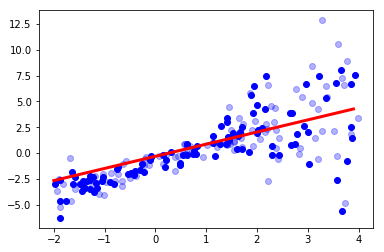

In [51]:
#visualize the predictions
import matplotlib.pyplot as plt

x_arr = np.arange(-2, 4, 0.1)

g2 = tf.Graph()
with tf.Session(graph = g2) as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess, './trained-model')
    
    y_arr = sess.run('y_hat:0', feed_dict= {'tf_x:0' : x_arr})
    
plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha = 0.3)
plt.plot(x_arr, y_arr.T[:, 0], '-r', lw = 3)
plt.show()

## Transforming Tensors as multidimensional data arrays


In [73]:
import tensorflow as tf
import numpy as np
g = tf.Graph()
with g.as_default():
    arr = np.array([[1., 2., 3., 3.5],
                   [4., 5., 6., 6.5],
                   [7., 8., 9., 9.5]])
    T1 = tf.constant(arr, name = 'T1')
    print(T1)
    
    s = T1.get_shape()
    print('Shape of T1 is', s)
    T2 = tf.Variable(tf.random_normal(shape = s))
    print(T2)
    T3 = tf.Variable(tf.random_normal(shape = (s.as_list()[0],))) #Variable can be subset with creating a pythonlist
    print(T3)

Tensor("T1:0", shape=(3, 4), dtype=float64)
Shape of T1 is (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>


In [58]:
#reshape tensor T1 to T4 and T5 (both rank 3)
with g.as_default():
    T4 = tf.reshape(T1, shape = [1,1,-1], name = 'T4')
    print(T4)
    T5 = tf.reshape(T1, shape = [1,3,-1], name = 'T5')
    print(T5)

Tensor("T4_1:0", shape=(1, 1, 12), dtype=float64)
Tensor("T5_1:0", shape=(1, 3, 4), dtype=float64)


In [59]:
with tf.Session(graph = g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

[[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]]

[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]]


In [60]:
#To transform an array in TF we use tf.transpose. We are able to change the order of the dimensions  by using perm =[...]
with g.as_default():
    T6 = tf.transpose(T5, perm=[2, 1, 0], name = 'T6')
    print(T6)
    T7 = tf.transpose(T5, perm=[0, 2, 1], name = 'T7')
    print(T7)

Tensor("T6:0", shape=(4, 3, 1), dtype=float64)
Tensor("T7:0", shape=(1, 4, 3), dtype=float64)


In [61]:
#We can also split a tensor into a list of subtensors using tf.split
with g.as_default():
    t5_splt = tf.split(T5, num_or_size_splits = 2, axis = 2, name = 'T8')
    print(t5_splt)

[<tf.Tensor 'T8:0' shape=(1, 3, 2) dtype=float64>, <tf.Tensor 'T8:1' shape=(1, 3, 2) dtype=float64>]


In [63]:
#Concatenation of multiple tensors if tensors have same shape and dtype
g = tf.Graph()
with g.as_default():
    t1 = tf.ones(shape=(5,1), dtype = tf.float32, name = 't1')
    t2 = tf.zeros(shape = (5,1), dtype = tf.float32, name = 't2')
    
    print(t1)
    print(t2)
    
with g.as_default():
    t3 = tf.concat([t1, t2], axis = 0, name = 't3')
    print(t3)
    t4 = tf.concat([t1, t2], axis = 1, name = 't4')
    print(t4)

Tensor("t1:0", shape=(5, 1), dtype=float32)
Tensor("t2:0", shape=(5, 1), dtype=float32)
Tensor("t3:0", shape=(10, 1), dtype=float32)
Tensor("t4:0", shape=(5, 2), dtype=float32)


In [64]:
with tf.Session(graph = g) as sess:
    print(t3.eval())
    print()
    print(t4.eval())

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## Control flow mechanics in building graphs

Some subtle differences exist between Python's control flow statemnts compared to TF's control flow functions

conider the following equation

res = x+y if x<y, otherwise x-y

In [65]:
import tensorflow as tf

x, y = 1.0, 2.0

g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(dtype = tf.float32, shape = None, name = 'tf_x')
    tf_y = tf.placeholder(dtype = tf.float32, shape = None, name = 'tf_y')
    
    if x < y:
        res = tf.add(tf_x, tf_y, name = 'result_add')
    else:
        res = tf.subtract(tf_x, tf_y, name = 'result_sub')
    
    print('Object:', res)
    
with tf.Session(graph = g) as sess:
    print('x < y: %s -> Result:' % (x<y),
         res.eval(feed_dict={'tf_x:0' : x,
                            'tf_y:0' : y}))
    x, y = 2.0, 1.0
    print('x < y: %s -> Result:' % (x<y),
         res.eval(feed_dict={'tf_x:0' : x,
                            'tf_y:0': y}))

Object: Tensor("result_add:0", dtype=float32)
x < y: True -> Result: 3.0
x < y: False -> Result: 3.0


Import to understant that the graph is static --> If we feed new values during the session, the values will keep going trough the same nodes (and thus the else subject is not called). Better to implement the following:

In [75]:
import tensorflow as tf

x, y = 1.0, 2.0

g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(dtype = tf.float32, shape = None, name = 'tf_x')
    tf_y = tf.placeholder(dtype = tf.float32, shape = None, name = 'tf_y')
    
    res = tf.cond(tf_x < tf_y,
                 lambda: tf.add(tf_x, tf_y, name = 'result_add'),
                 lambda: tf.subtract(tf_x, tf_y, name = 'result_sub'))
      
    print('Object:', res)
    
with tf.Session(graph = g) as sess:
    print('x < y: %s -> Result:' % (x<y),
         res.eval(feed_dict={'tf_x:0' : x,
                            'tf_y:0' : y}))
    x, y = 2.0, 1.0
    print('x < y: %s -> Result:' % (x<y),
         res.eval(feed_dict={'tf_x:0' : x,
                            'tf_y:0': y}))

Object: Tensor("cond/Merge:0", dtype=float32)
x < y: True -> Result: 3.0
x < y: False -> Result: 1.0


Similar to tf.cond, we can also use tf.case (as if..else statement) or tf.while_loop;

In [67]:
if (x<y):
    result = 1
else:
    result = 0

#In python is similar to the following in TF

f1 = lambda: tf.constant(1)
f2 = lambda: tf.constant(0)
result = tf.case([(tf.less(x,y), f1)], default = f2)

In [68]:
i = tf.constant(0)
threshold = 100
c = lambda i: tf.less(i, 100)
b = lambda i: tf.add(i,1)
tf.while_loop(cond = c, body = b, loop_vars=[i])

<tf.Tensor 'while/Exit:0' shape=() dtype=int32>

## Visualizing the graph with TensorBoard

In [69]:
batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100),
                         dtype = tf.float32, name = 'tf_X')
    
    #build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data = tf_X, n_hidden = 50)
        
    #build the classifier
    with tf.variable_scope('classifier') as scope:
        cls_out1 = build_classifier(data = tf_X, labels = tf.ones(shape = batch_size))
        
        #reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(data = gen_out1[1], labels = tf.zeros(shape = batch_size))
        
    #OR reuse the classifier for generated data as follows/
    #with tf.variable_scope('classifier', reuse = True):
    #    cls_out2 = build_classifier(data = gen_out1[1], labels = tf.zeros(shape = batch_size))

In [76]:
with tf.Session(graph = g) as sess:
    file_writer = tf.summary.FileWriter(logdir='./logs/', graph = g)